In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Reading the dataset

bike_pd = pd.read_csv('day.csv')
bike_pd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_pd.shape

(730, 16)

In [5]:
bike_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for the descriptive statistics

bike_pd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Insight:
#### In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.
#### Data Quality checks
#### Check for Null values in the dataset
First, we can load the dataset into a Pandas DataFrame and then perform the following data quality checks:
1. Check for missing values in the 'CNT' column
2. Check for any duplicate rows
3. Check for data types of columns
4. Check for outliers in the 'CNT' column
5. Visualize missing data using Missingno

In [8]:
bike_pd.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Creating a copy of the original dataset for to check for the duplicates

bike_pred_dup = bike_pd
bike_pred_dup.drop_duplicates(subset=None, inplace=True)

In [10]:
# Checking the dataframe

bike_pred_dup.shape

(730, 16)

#### Insight: Checking the dataset, we can clearly see that there are no Missing/Null values. Upon checking , clearly there are exact same rows and columns as on the original dataset, therefore,no duplicates data in the original dataset.Data Cleaning Removing the unwanted and unnecessary columns

In [12]:
# Checking the columns

bike_pd.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:

# Creating a new dataframe, so that the original dataset may be preserved for the future work.

bike_pred_new = bike_pd[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum'
                     , 'windspeed', 'cnt']]
bike_pred_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables
### We will create Dummy variables for the categorical variables namely, 'mnth, weekday, season and weathersit'.
### First, we need to convert these columns into categories for to perform any analysis.

In [15]:
# Viewing the dataset before the conversion

bike_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
# Converting the above mentioned columns into categories

bike_pred_new.season = bike_pred_new.season.astype('category')
bike_pred_new.weekday = bike_pred_new.weekday.astype('category')
bike_pred_new.mnth = bike_pred_new.mnth.astype('category')
bike_pred_new.weathersit = bike_pred_new.weathersit.astype('category')
bike_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [17]:
# Creating dummies of the converted variables and dropping the first variable as (n-1) 
# factors are needed for the dummy variables.

bike_pred_new = pd.get_dummies(bike_pred_new, drop_first=True)
bike_pred_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

### Splitting into Train/Test set
### Splitting the dataset into TRAIN-TEST SET (70:30 ratio)

In [19]:
# Checking the shape of dataset before splitting

bike_pred_new.shape

(730, 30)

In [20]:
# Using the train_test_split method for achieving train and test dataset

bike_train, bike_test = train_test_split(bike_pred_new, train_size=0.70, test_size=0.30, random_state=0)

In [21]:
# Checking the shape of train set

bike_train.shape

(510, 30)

In [22]:
# Checking the shape of test set

bike_test.shape

(219, 30)

### Exploratory Data Analysis
### Making a Pairplot for the Numerical cols.

In [24]:
# Checking for the numerical columns

bike_pred_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

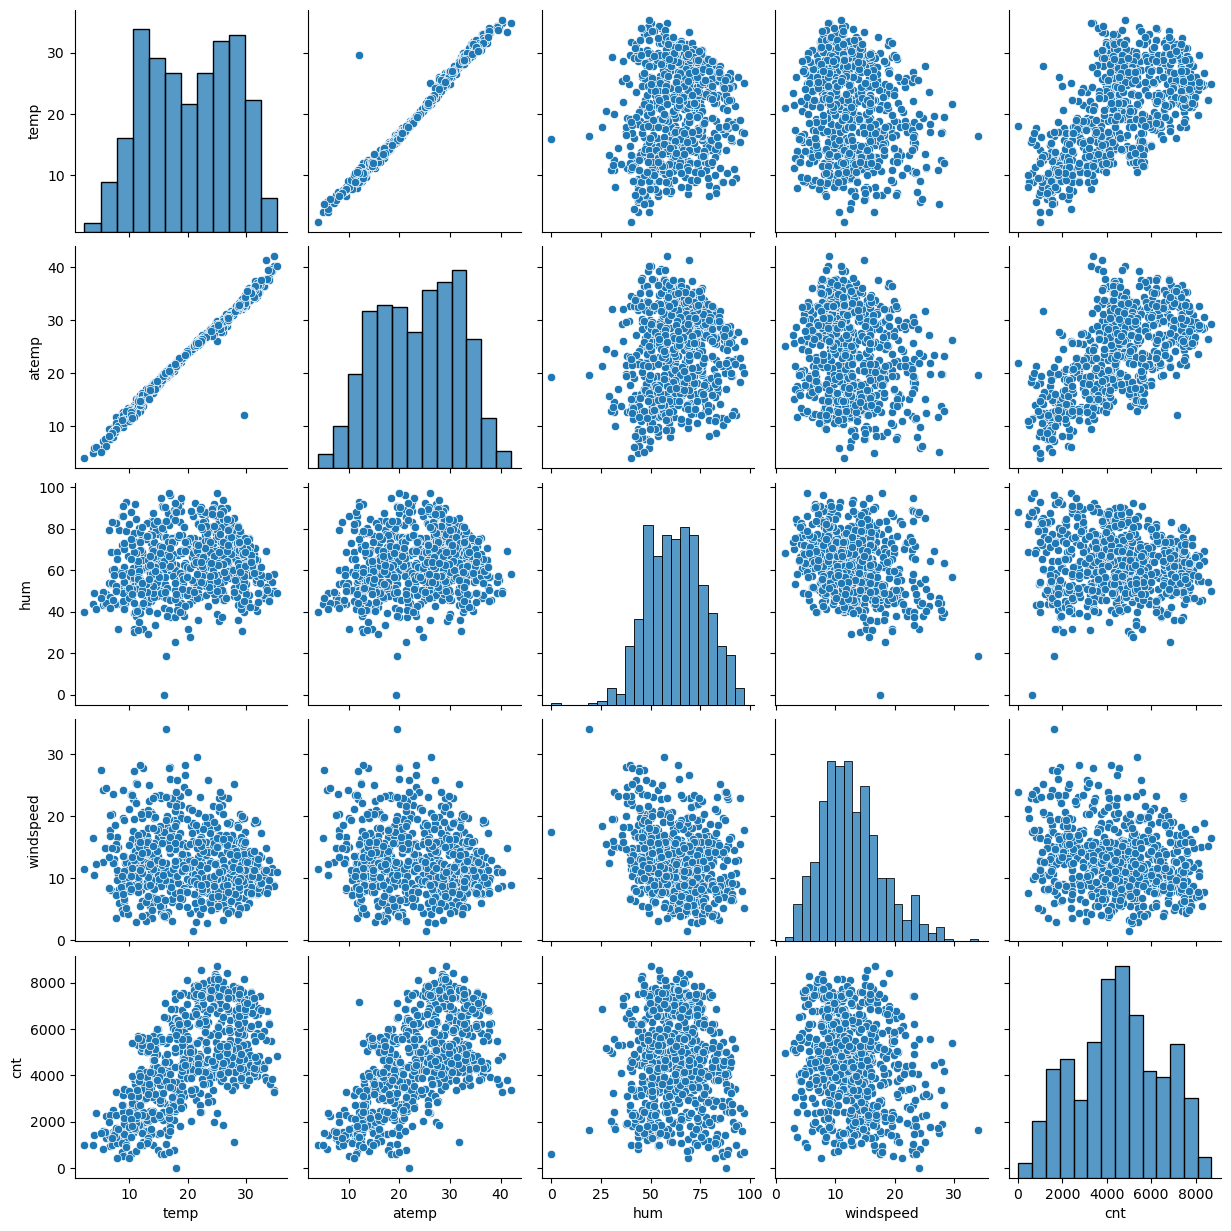

In [25]:
# Creating a pairplot using the numerical columns

bike_pred_num = bike_pred_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike_pred_num)
plt.show()

### From the pairplot, we can make the following observations:- The scatterplots show the relationships between each pair of variables. For example, we can see how 'temp' and 'atemp' are related, as well as how 'temp' and 'cnt' are related.- The histograms along the diagonal show the distributions of each individual variable. This allows us to see the spread and shape of the data for each variable. 
### From the pairplots we can clearly conclude that there is a relation among 'temp', 'atemp' & 'cnt'.

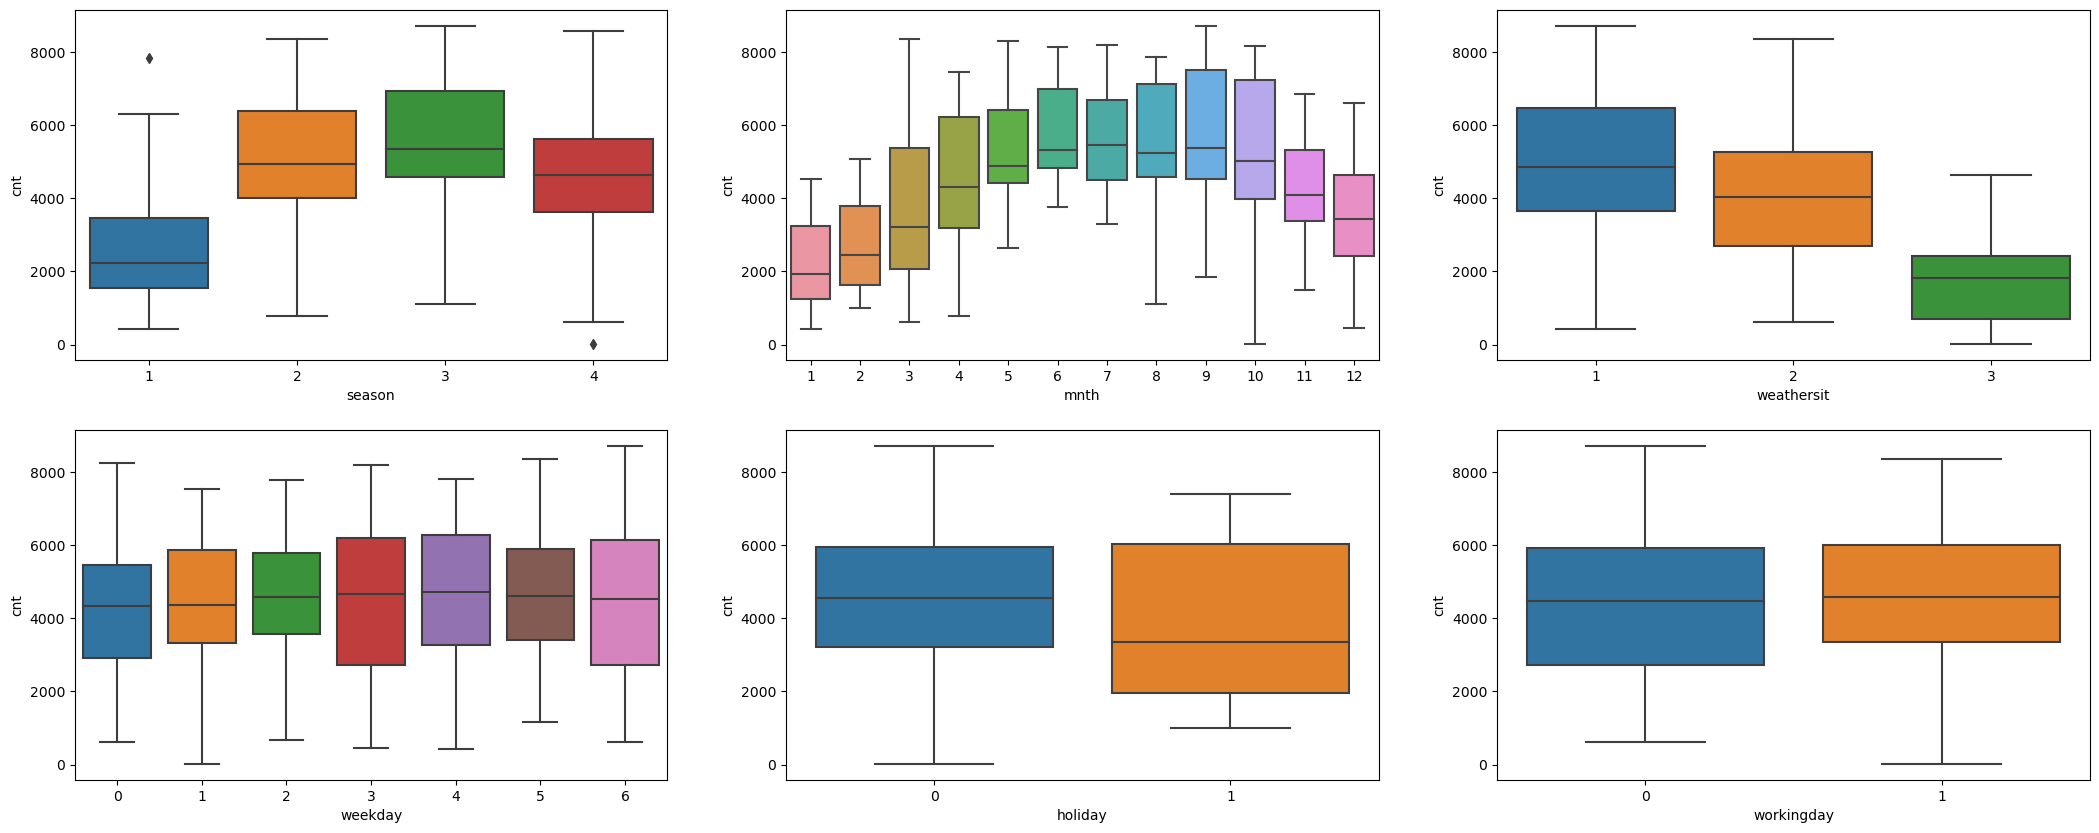

In [27]:
# Building boxplots for each categories with the help of subplots.

# We'll be using 'cnt' as target variable and all the categories as independent variables.

plt.figure(figsize=(26,10))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_pd)

plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=bike_pd)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data=bike_pd)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data=bike_pd)

plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=bike_pd)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_pd)

plt.show()

### - "Season": Season 3 has the highest number of bookings, indicating a potential relationship between season and demand for bikes.

### - "Mnth": There is a trend in the bookings based on the months, with mid-month showing higher bookings, suggesting that month could be a good predictor variable.

### - "Weathersit": Bookings are highest for weather situation 1, and there are trends over the course of 2 years, indicating that weather situation could be a good predictor variable.

### - "Weekday": There doesn't seem to be a clear trend in the weekday dataset, suggesting that it may not be a good predictor for the demand for bikes.

### - "Holiday": Most bookings occur when it is not a holiday, indicating a bias and suggesting that holiday may not be a good predictor for the demand for bikes.

### - "Workingday": Bookings are highest between 4000 and 6000, indicating a potential relationship between working day and demand for bikes.


## Correlation Matrix

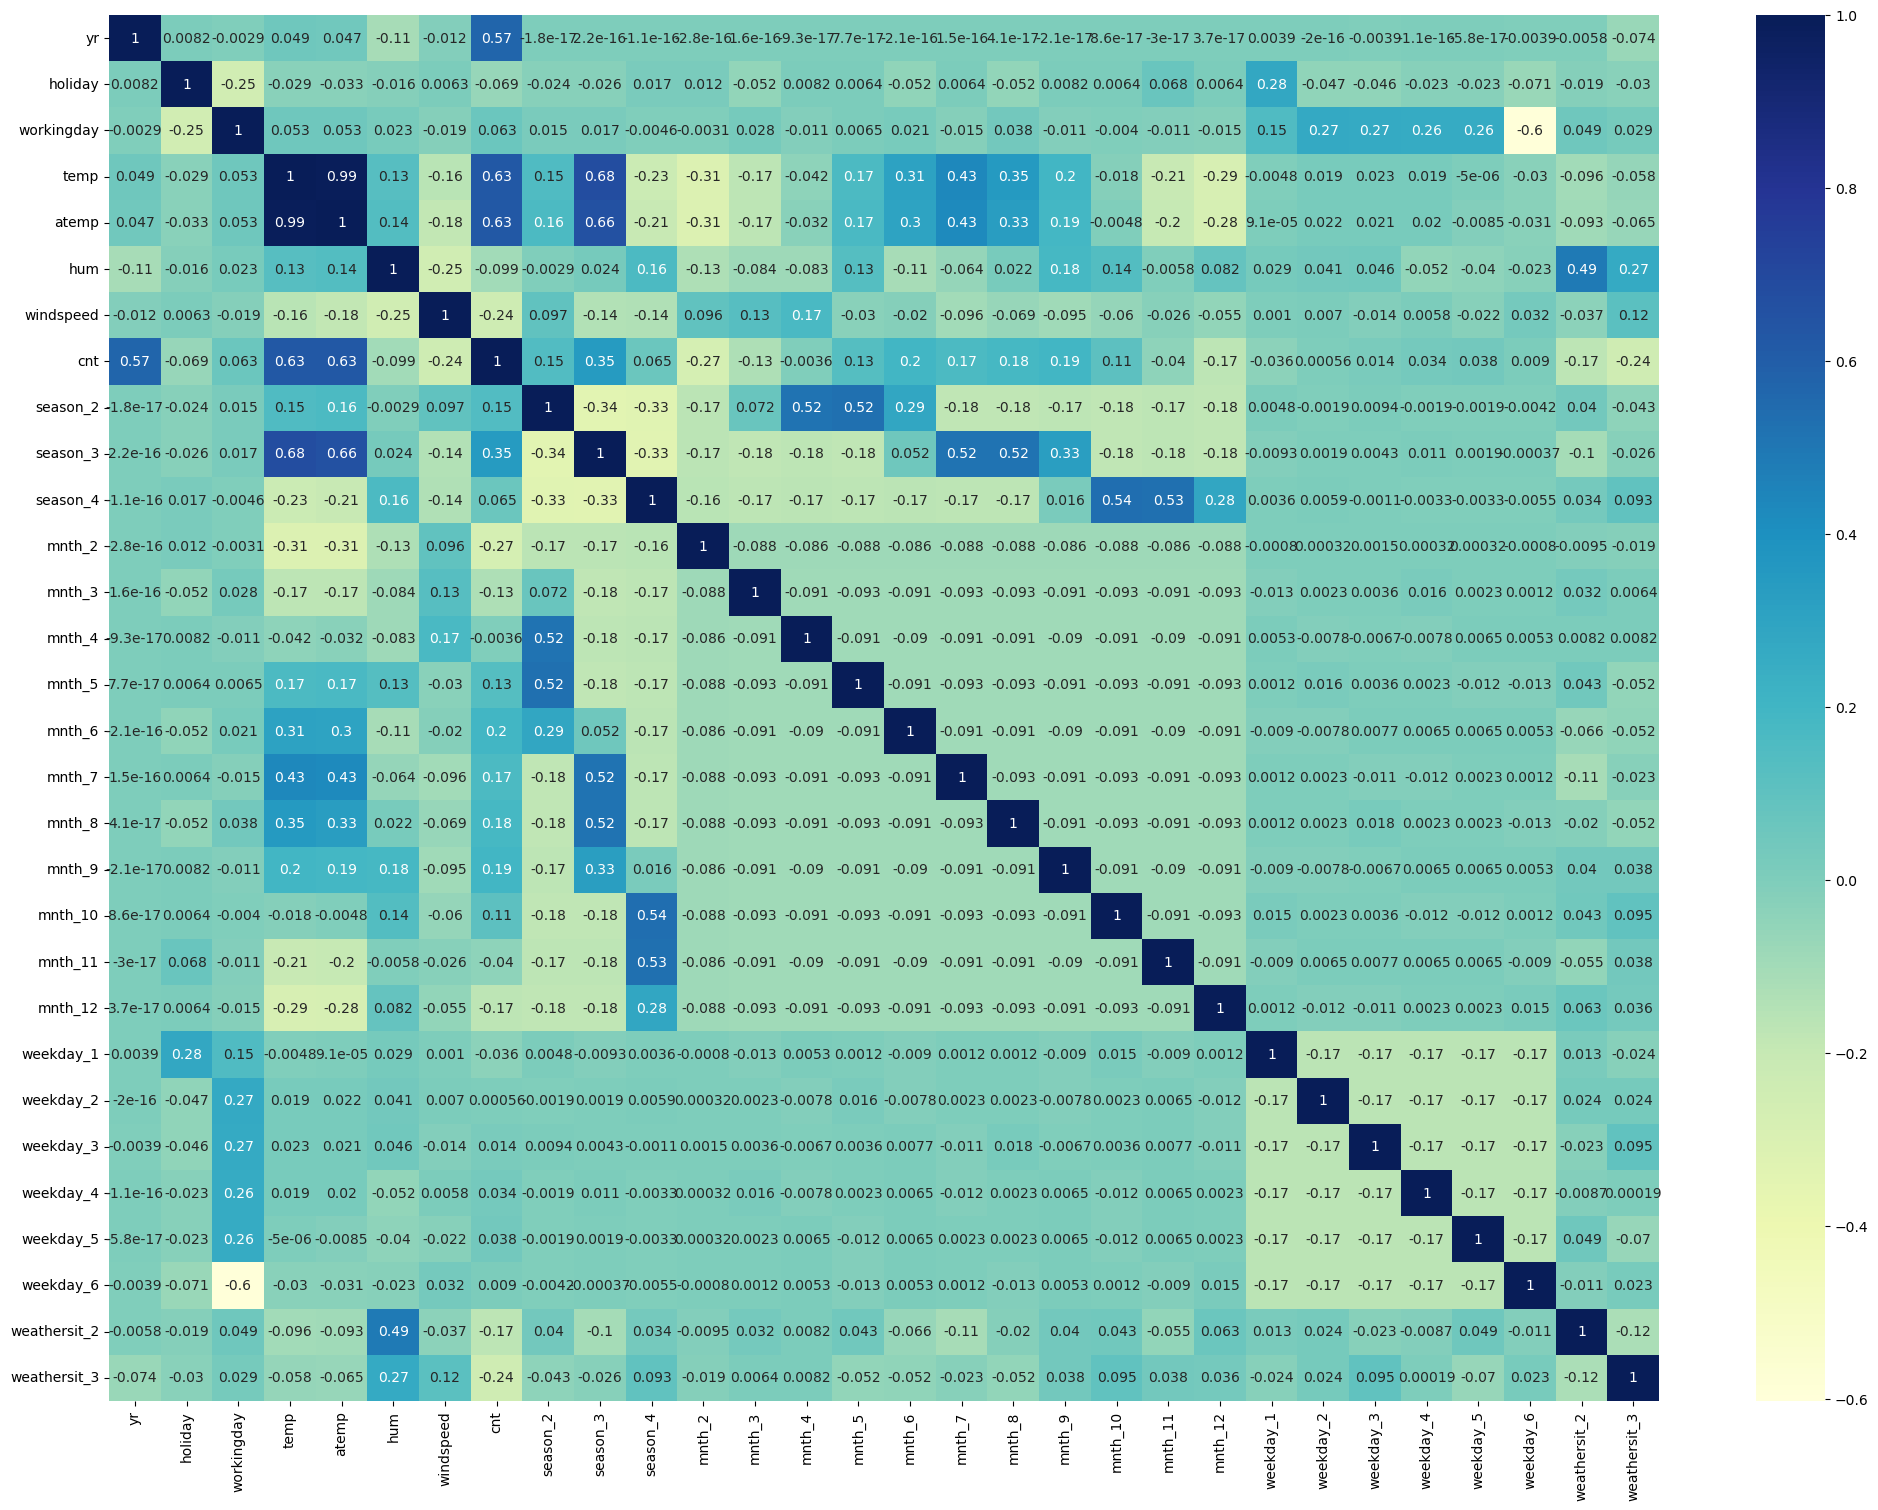

In [30]:
# Checking for the correlation among different variables with the help of heatmap.

plt.figure(figsize=(25,18))

sns.heatmap(bike_pred_new.corr(), annot=True, cmap='YlGnBu')

plt.show()

In [31]:
# Instantiating the object

scaler = MinMaxScaler()

In [32]:
# Looking the dataset before scaling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,27.606653,31.53460,60.5000,16.958236,5130,False,True,...,False,False,False,False,True,False,False,False,False,False
524,1,0,0,29.144153,32.41835,43.7083,9.667229,7498,True,False,...,False,False,False,False,False,False,False,True,False,False
12,0,0,1,6.765000,7.54415,47.0417,20.167000,1406,False,False,...,False,False,False,False,False,True,False,False,False,False
161,0,0,0,29.725000,33.90190,65.4583,10.374950,4966,True,False,...,False,False,False,False,False,False,False,True,False,False
556,1,0,1,29.383347,32.51355,63.3333,10.166111,7264,False,True,...,False,False,False,False,True,False,False,False,False,False


In [33]:
# Creating a list of numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [34]:
# Using the scaler() function in the numeric variables

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [35]:
# Checking the dataset after scaling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0.587667,False,True,...,False,False,False,False,True,False,False,False,False,False
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,True,False,...,False,False,False,False,False,False,False,True,False,False
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0.159227,False,False,...,False,False,False,False,False,True,False,False,False,False
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0.568799,True,False,...,False,False,False,False,False,False,False,True,False,False
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,False,True,...,False,False,False,False,True,False,False,False,False,False


In [36]:
# Descriptive statistics

bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.690196,0.515088,0.510792,0.514523,0.373755,0.513956
std,0.500491,0.169124,0.462867,0.243011,0.227658,0.194619,0.192867,0.217056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.311891,0.361513,0.232054,0.365221
50%,0.500000,0.000000,1.000000,0.503362,0.514074,0.513631,0.353541,0.521859
75%,1.000000,0.000000,1.000000,0.734800,0.704145,0.651342,0.483991,0.670156
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building the Linear Model

In [38]:
     # Dividing the Target var. & Independent var. into X and y for building the linear model

y_train = bike_train.pop('cnt')
X_train = bike_train
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.690196,0.515088,0.510792,0.514523,0.373755
std,0.500491,0.169124,0.462867,0.243011,0.227658,0.194619,0.192867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.311891,0.361513,0.232054
50%,0.500000,0.000000,1.000000,0.503362,0.514074,0.513631,0.353541
75%,1.000000,0.000000,1.000000,0.734800,0.704145,0.651342,0.483991
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## RFE : Recursive Feature Elimination

In [40]:
# Initialize the Linear Regression model
lm = LinearRegression()

# Initialize RFE and fit it directly
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Storing the 'True' columns from the rfe.support_ list

col = X_train.columns[rfe.support_]
col
# Having a look to the columns that haven't been taken by the rfe.support_

X_train.columns[~rfe.support_]

# Creating X_test df with the RFE selected vars.

X_train_rfe = X_train[col]
X_train_rfe = X_train_rfe.astype('float64')

## Building Linear Model using Stats Model
### Model 1:

In [42]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,atemp,20.64
3,hum,11.35
6,season_3,7.32
5,season_2,4.04
4,windspeed,3.32
7,season_4,2.98
13,weathersit_2,2.35
0,yr,1.98
12,mnth_10,1.70
9,mnth_5,1.65


In [43]:
# Adding a constant

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a first fitted model

lr1 = sm.OLS(y_train, X_train_sm1)
# Using the .fit() function

lr1_model = lr1.fit()

# Checking the parameters

lr1_model.params

const           0.200189
yr              0.221234
holiday        -0.059590
atemp           0.471562
hum            -0.163810
windspeed      -0.120914
season_2        0.118978
season_3        0.114342
season_4        0.148812
mnth_3          0.041736
mnth_5          0.049152
mnth_7         -0.057609
mnth_9          0.082365
mnth_10         0.056579
weathersit_2   -0.037760
weathersit_3   -0.185859
dtype: float64

In [44]:
# Printing the summary 

lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sat, 25 May 2024   Prob (F-statistic):          6.67e-179
Time:                        14:28:30   Log-Likelihood:                 507.52
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     494   BIC:                            -915.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2002      0.021      9.487      0.000       0.159       0.242
yr               0.2212      0.008     26.801      0.000       0.205       0.237
holiday         -0.0596      0.024     -2.480      0.013      -0.107      -0.012
atemp            0.4716      0.035     13.483      0.000       0.403       0.540
hum             -0.1638      0.030     -5.412      0.000      -0.223      -0.104
windspeed       -0.1209      0.023     -5.273      0.000      -0.166      -0.076
season_2         0.1190      0.016      7.467      0.000       0.088       0.150
season_3         0.1143      0.022      5.286      0.000       0.072       0.157
season_4         0.1488      0.014     10.339      0.000       0.121       0.177
mnth_3           0.0417      0.015      2.748      0.006       0.012       0.072
mnth_5           0.0492      0.018      2.773      0.006       0.014       0.084
mnth_7          -0.0576      0.019     -3.082      0.002      -0.094      -0.021
mnth_9           0.0824      0.018      4.681      0.000       0.048       0.117
mnth_10          0.0566      0.018      3.131      0.002       0.021       0.092
weathersit_2    -0.0378      0.011     -3.468      0.001      -0.059      -0.016
weathersit_3    -0.1859      0.031     -5.958      0.000      -0.247      -0.125
==============================================================================
Omnibus:                       86.382   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.436
Skew:                          -0.833   Prob(JB):                     3.37e-51
Kurtosis:                       5.857   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2:
#### Note:Removing the 'atemp' variable as it has a very high VIF value.

In [46]:
# Dropping the 'atemp' columns because of its high VIF Value and high P value.

X_train_new = X_train_rfe.drop(['atemp'], axis=1)

In [47]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,8.26
3,windspeed,3.17
5,season_3,3.17
6,season_4,2.71
4,season_2,2.47
12,weathersit_2,2.18
0,yr,1.86
8,mnth_5,1.64
11,mnth_10,1.60
9,mnth_7,1.59


In [48]:
# Adding a constant

X_train_sm2 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr2 = sm.OLS(y_train, X_train_sm2)

In [49]:
# Using the .fit() function

lr2_model = lr2.fit()

# Checking the parameters

lr2_model.params

const           0.301177
yr              0.235407
holiday        -0.057608
hum            -0.085843
windspeed      -0.145025
season_2        0.248243
season_3        0.330339
season_4        0.191175
mnth_3          0.042176
mnth_5          0.081654
mnth_7         -0.011711
mnth_9          0.079771
mnth_10         0.123417
weathersit_2   -0.062523
weathersit_3   -0.230827
dtype: float64

In [50]:
# Printing the summary 

lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sat, 25 May 2024   Prob (F-statistic):          1.50e-146
Time:                        14:28:30   Log-Likelihood:                 427.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     495   BIC:                            -761.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3012      0.023     13.067      0.000       0.256       0.346
yr               0.2354      0.010     24.608      0.000       0.217       0.254
holiday         -0.0576      0.028     -2.052      0.041      -0.113      -0.002
hum             -0.0858      0.035     -2.473      0.014      -0.154      -0.018
windspeed       -0.1450      0.027     -5.429      0.000      -0.198      -0.093
season_2         0.2482      0.015     16.695      0.000       0.219       0.277
season_3         0.3303      0.017     19.455      0.000       0.297       0.364
season_4         0.1912      0.016     11.648      0.000       0.159       0.223
mnth_3           0.0422      0.018      2.377      0.018       0.007       0.077
mnth_5           0.0817      0.021      3.980      0.000       0.041       0.122
mnth_7          -0.0117      0.021     -0.545      0.586      -0.054       0.030
mnth_9           0.0798      0.021      3.880      0.000       0.039       0.120
mnth_10          0.1234      0.020      6.079      0.000       0.084       0.163
weathersit_2    -0.0625      0.013     -4.986      0.000      -0.087      -0.038
weathersit_3    -0.2308      0.036     -6.370      0.000      -0.302      -0.160
==============================================================================
Omnibus:                       65.354   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.404
Skew:                          -0.594   Prob(JB):                     8.26e-44
Kurtosis:                       5.815   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3:
#### Note:due to high VIF Value we should remove 'mnth_5' variable.

In [52]:
# Dropping the 'hum' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['hum'], axis=1)

In [53]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,windspeed,2.81
4,season_3,2.49
3,season_2,2.21
5,season_4,2.14
0,yr,1.82
10,mnth_10,1.60
8,mnth_7,1.59
7,mnth_5,1.55
11,weathersit_2,1.50
9,mnth_9,1.42


In [54]:

X_train_sm3 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr3 = sm.OLS(y_train, X_train_sm3)
# Using the .fit() function

lr3_model = lr3.fit()

# Checking the parameters

lr3_model.params

const           0.260910
yr              0.238304
holiday        -0.058982
windspeed      -0.125579
season_2        0.245523
season_3        0.323927
season_4        0.186103
mnth_3          0.040413
mnth_5          0.071054
mnth_7         -0.009695
mnth_9          0.071267
mnth_10         0.119027
weathersit_2   -0.080676
weathersit_3   -0.272362
dtype: float64

In [55]:
# Printing the summary 

lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sat, 25 May 2024   Prob (F-statistic):          2.69e-146
Time:                        14:28:30   Log-Likelihood:                 424.48
No. Observations:                 510   AIC:                            -821.0
Df Residuals:                     496   BIC:                            -761.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2609      0.016     15.912      0.000       0.229       0.293
yr               0.2383      0.010     24.971      0.000       0.220       0.257
holiday         -0.0590      0.028     -2.090      0.037      -0.114      -0.004
windspeed       -0.1256      0.026     -4.894      0.000      -0.176      -0.075
season_2         0.2455      0.015     16.473      0.000       0.216       0.275
season_3         0.3239      0.017     19.205      0.000       0.291       0.357
season_4         0.1861      0.016     11.370      0.000       0.154       0.218
mnth_3           0.0404      0.018      2.267      0.024       0.005       0.075
mnth_5           0.0711      0.020      3.524      0.000       0.031       0.111
mnth_7          -0.0097      0.022     -0.449      0.653      -0.052       0.033
mnth_9           0.0713      0.020      3.498      0.001       0.031       0.111
mnth_10          0.1190      0.020      5.855      0.000       0.079       0.159
weathersit_2    -0.0807      0.010     -7.895      0.000      -0.101      -0.061
weathersit_3    -0.2724      0.032     -8.438      0.000      -0.336      -0.209
==============================================================================
Omnibus:                       64.822   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.556
Skew:                          -0.605   Prob(JB):                     1.87e-41
Kurtosis:                       5.714   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Error Terms are distributed normally with mean zero (not X, Y)

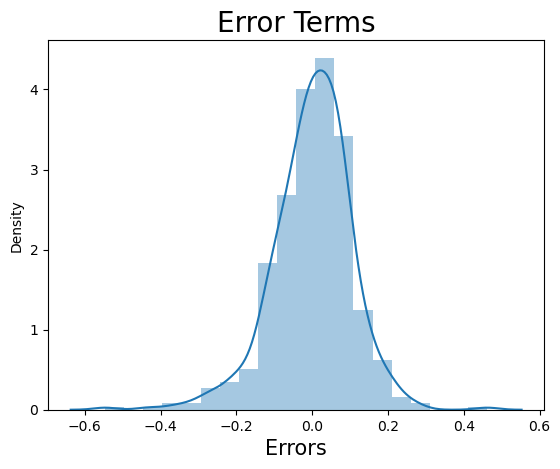

In [57]:
y_train_pred = lr3_model.predict(X_train_sm3)
res = y_train - y_train_pred
# Plotting histogram of the error terms

sns.distplot((res), bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)

plt.show()

#### Insight: From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

#### Check for Residuals and Assumptions:
#### Normality of residuals: Plot a histogram or Q-Q plot of the residuals. Homoscedasticity: Plot residuals vs. fitted values to check for any patterns. Independence: Check the Durbin-Watson statistic (which is already provided).

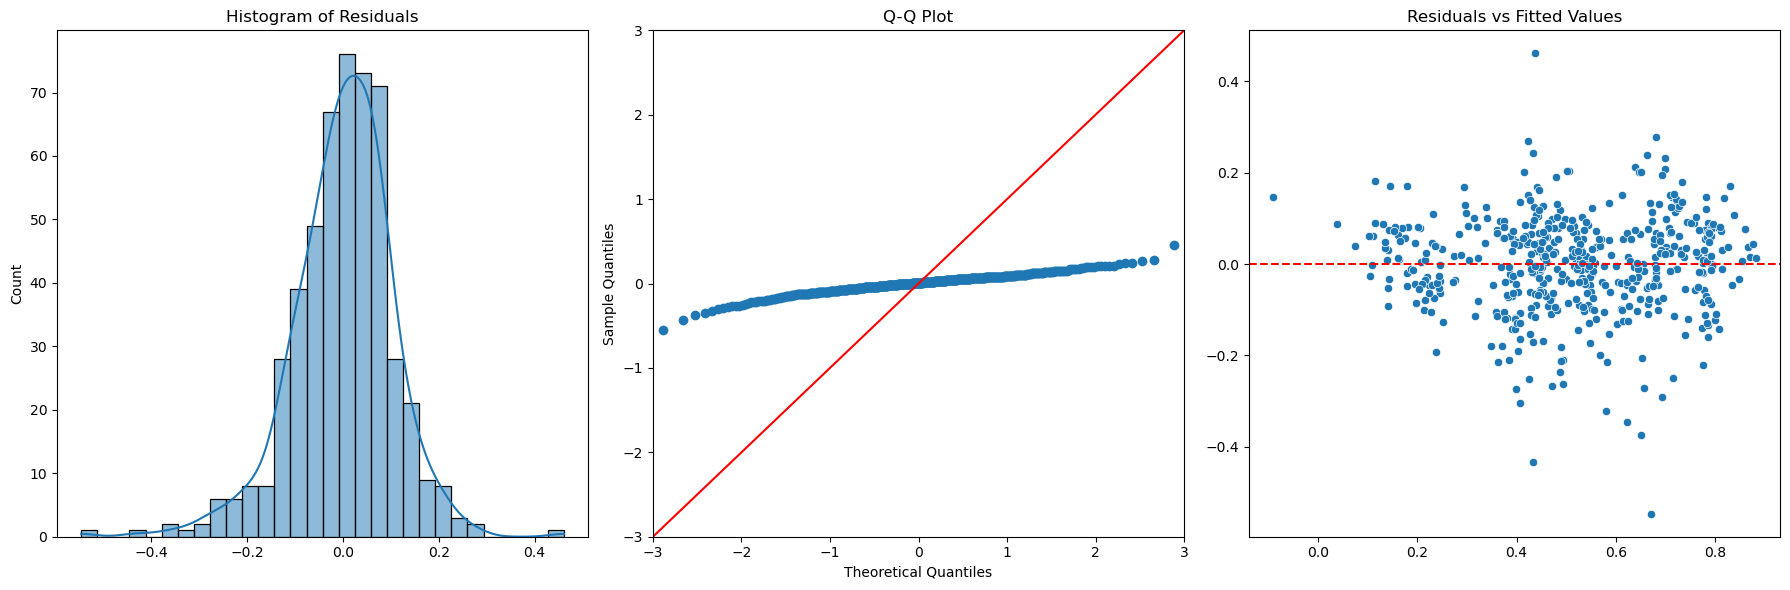

In [60]:
# Residuals
residuals = lr3_model.resid

# Plotting the residuals
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')

# Q-Q plot
sm.qqplot(residuals, line ='45', ax=axes[1])
axes[1].set_title('Q-Q Plot')

# Residuals vs. fitted values
fitted_values = lr3_model.fittedvalues
sns.scatterplot(x=fitted_values, y=residuals, ax=axes[2])
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_title('Residuals vs Fitted Values')

plt.tight_layout()
plt.show()


### Histogram of Residuals:

### The histogram of residuals appears to be roughly bell-shaped and symmetric around zero, which suggests that the residuals are approximately normally distributed. This is a good indication that the assumption of normality is reasonably met.

### Q-Q Plot:

### The Q-Q plot shows some deviation from the line, especially in the tails. This indicates that there might be some issues with normality, particularly in the tails. However, given the large sample size, slight deviations can be tolerated.

### Residuals vs. Fitted Values:

### The residuals vs. fitted values plot shows a random scatter around the horizontal line at zero, which is a good sign that there is no clear pattern. This indicates that the assumptions of linearity and homoscedasticity (constant variance) are reasonably met.

In [62]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,windspeed,2.81
4,season_3,2.49
3,season_2,2.21
5,season_4,2.14
0,yr,1.82
10,mnth_10,1.60
8,mnth_7,1.59
7,mnth_5,1.55
11,weathersit_2,1.50
9,mnth_9,1.42


In [63]:
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sat, 25 May 2024   Prob (F-statistic):          2.69e-146
Time:                        14:28:31   Log-Likelihood:                 424.48
No. Observations:                 510   AIC:                            -821.0
Df Residuals:                     496   BIC:                            -761.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2609      0.016     15.912      0.000       0.229       0.293
yr               0.2383      0.010     24.971      0.000       0.220       0.257
holiday         -0.0590      0.028     -2.090      0.037      -0.114      -0.004
windspeed       -0.1256      0.026     -4.894      0.000      -0.176      -0.075
season_2         0.2455      0.015     16.473      0.000       0.216       0.275
season_3         0.3239      0.017     19.205      0.000       0.291       0.357
season_4         0.1861      0.016     11.370      0.000       0.154       0.218
mnth_3           0.0404      0.018      2.267      0.024       0.005       0.075
mnth_5           0.0711      0.020      3.524      0.000       0.031       0.111
mnth_7          -0.0097      0.022     -0.449      0.653      -0.052       0.033
mnth_9           0.0713      0.020      3.498      0.001       0.031       0.111
mnth_10          0.1190      0.020      5.855      0.000       0.079       0.159
weathersit_2    -0.0807      0.010     -7.895      0.000      -0.101      -0.061
weathersit_3    -0.2724      0.032     -8.438      0.000      -0.336      -0.209
==============================================================================
Omnibus:                       64.822   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.556
Skew:                          -0.605   Prob(JB):                     1.87e-41
Kurtosis:                       5.714   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lr3_model.params

const           0.260910
yr              0.238304
holiday        -0.058982
windspeed      -0.125579
season_2        0.245523
season_3        0.323927
season_4        0.186103
mnth_3          0.040413
mnth_5          0.071054
mnth_7         -0.009695
mnth_9          0.071267
mnth_10         0.119027
weathersit_2   -0.080676
weathersit_3   -0.272362
dtype: float64

- Hypothesis statement states that:

H0 : B1 = B2 = ... = Bn = 0

H1 : Bi != 0

Here H0 --> Null Hypothesis
     H1 --> Alternate Hypothesis.


### Equation for the best fit line:
### cnt = 0.260910 + (0.238304 * yr) - (0.058982 * holiday)-(0.125579 * windspeed)+(0.245523 * season_2)+(0.323927 * season_3)+(0.186103 * season_4) +(0.040413 * mnth_3)+( 0.071054* mnth_5)-(0.009695 * mnth_7) +(0.071267 * mnth_9)+(0.119027 * mnth_10)-(0.080676* weathersit_2) -(0.272362* weathersit_3)


### Interpretation of the equation:

#### Intercept (0.260910):This is the baseline value of the bike count (cnt) when all other variables are zero. This value is not very interpretable in this context because it doesn't make sense to have all variables at zero (e.g., no year, no season).

#### Year (yr, 0.238304):For each additional year, the bike count increases by 0.238304 units, holding all other variables constant. This indicates that bike usage has been increasing over time.

#### Holiday (-0.058982):If the day is a holiday, the bike count decreases by 0.058982 units compared to a non-holiday, holding all other variables constant. This suggests that fewer people use bikes on holidays.

#### Windspeed (-0.125579):For each unit increase in windspeed, the bike count decreases by 0.125579 units, holding all other variables constant. This implies that higher windspeed discourages bike usage.

#### Season (season_2, 0.245523; season_3, 0.323927; season_4, 0.186103):Compared to the baseline season (season_1, which is not included in the model), being in season_2 (spring) increases the bike count by 0.245523 units, being in season_3 (summer) increases it by 0.323927 units, and being in season_4 (fall) increases it by 0.186103 units. This indicates that bike usage is highest in summer, followed by spring and fall, compared to winter.

#### Month (mnth_3, 0.040413; mnth_5, 0.071054; mnth_7, -0.009695; mnth_9, 0.071267; mnth_10, 0.119027):Compared to the baseline month (mnth_1, January, which is not included in the model), being in March (mnth_3) increases the bike count by 0.040413 units, being in May (mnth_5) increases it by 0.071054 units, being in July (mnth_7) decreases it by 0.009695 units, being in September (mnth_9) increases it by 0.071267 units, and being in October (mnth_10) increases it by 0.119027 units. This shows that bike usage varies across the months, with the highest increase in October.

#### Weather Situation (weathersit_2, -0.080676; weathersit_3, -0.272362):Compared to the baseline weather situation (weathersit_1, clear or partly cloudy), being in weathersit_2 (mist + cloud) decreases the bike count by 0.080676 units, and being in weathersit_3 (light rain or snow) decreases it by 0.272362 units. This indicates that adverse weather conditions significantly reduce bike usage.

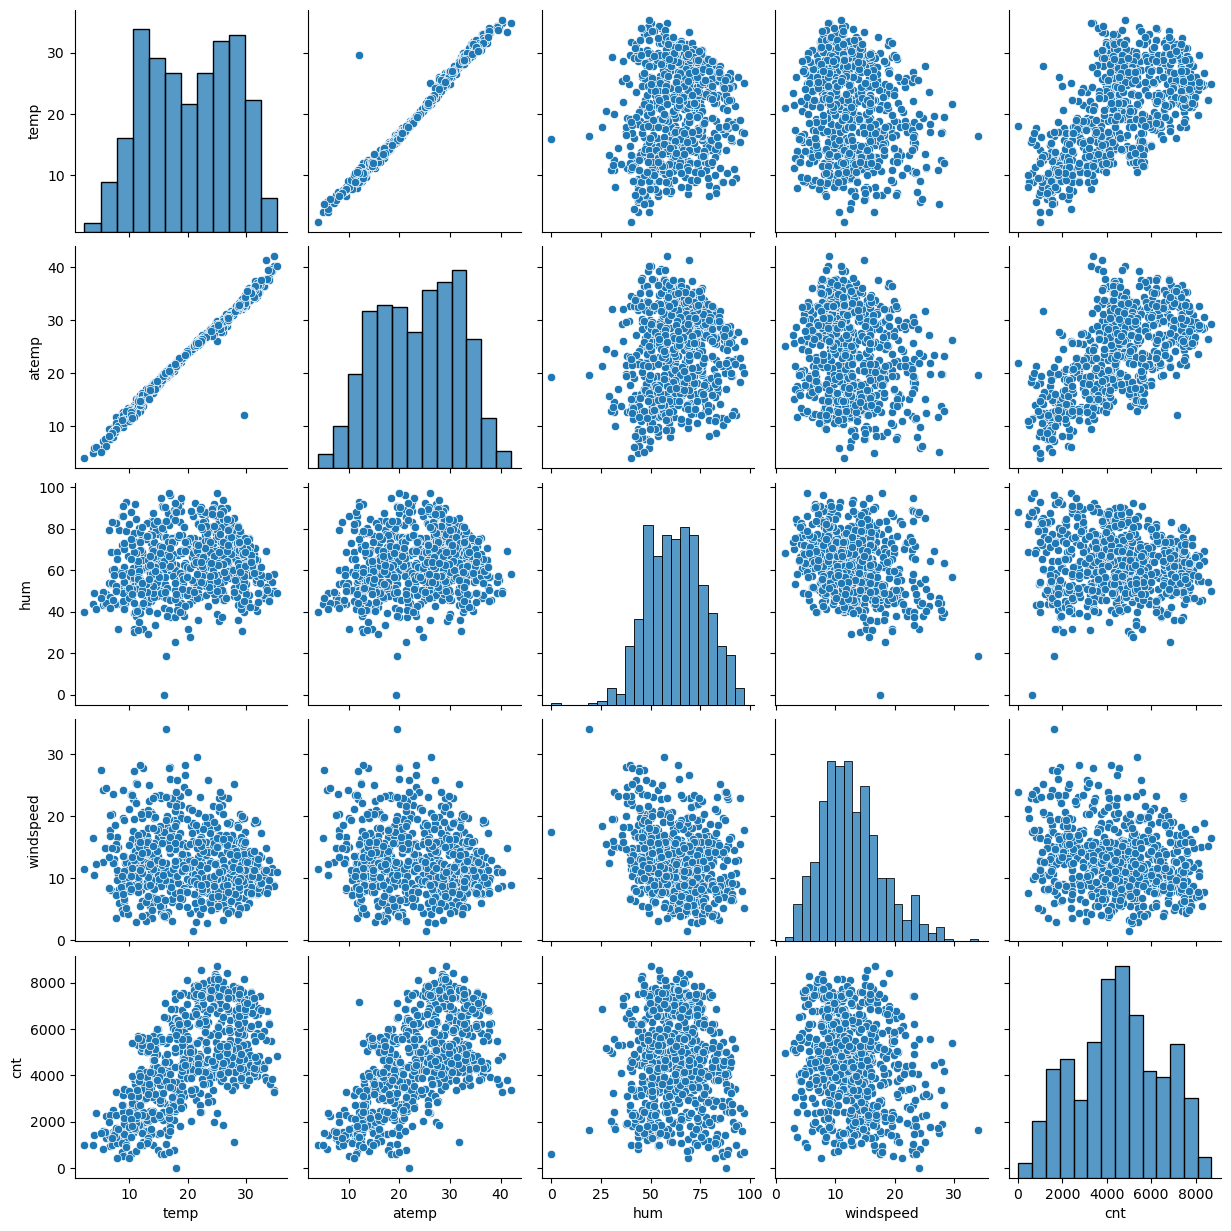

In [68]:
# Creating a pairplot using the numerical columns

bike_pred_num = bike_pred_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike_pred_num)
plt.show()

### Insight:
Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## No Multicollinearity among the predictor variables

In [71]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,windspeed,2.81
4,season_3,2.49
3,season_2,2.21
5,season_4,2.14
0,yr,1.82
10,mnth_10,1.60
8,mnth_7,1.59
7,mnth_5,1.55
11,weathersit_2,1.50
9,mnth_9,1.42


### Insight:
From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

Making Prediction using Final Model
It's time to predict the final model using the Test dataset as with the help of Train dataset we have made our assumptions above.

Applying Scaler function

In [74]:
# Using scaler.transform as we want our Test data to predict learned from the Training data.

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,0,0.771285,0.741444,0.460557,0.415865,0.678900,False,True,...,False,False,False,False,False,False,False,True,False,False
187,0,0,1,0.854058,0.808256,0.552784,0.292782,0.525771,False,True,...,False,False,False,False,False,True,False,False,False,False
14,0,0,0,0.178804,0.205177,0.340487,0.289684,0.141049,False,False,...,False,False,False,False,False,False,False,True,True,False
31,0,0,1,0.125012,0.186509,0.801018,0.027323,0.153935,False,False,...,False,False,False,True,False,False,False,False,True,False
390,1,0,1,0.320391,0.353539,0.717517,0.077873,0.466291,False,False,...,False,False,False,False,False,True,False,False,True,False


In [75]:
# Descriptive statistics

bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.027397,0.666667,0.537535,0.530211,0.533186,0.365412,0.520493
std,0.501140,0.163612,0.472484,0.230350,0.215531,0.206381,0.198115,0.236180
min,0.000000,0.000000,0.000000,-0.048868,-0.027173,-0.353829,-0.049874,0.067073
25%,0.000000,0.000000,0.000000,0.359598,0.370098,0.386311,0.226618,0.354809
50%,0.000000,0.000000,1.000000,0.564352,0.567870,0.529582,0.327053,0.519673
75%,1.000000,0.000000,1.000000,0.722275,0.693736,0.678414,0.463343,0.723194
max,1.000000,1.000000,1.000000,0.982573,1.019965,0.986079,1.165056,0.981707


Dividing into X_test and y_test

In [77]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 196 to 200
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    bool   
 8   season_3      219 non-null    bool   
 9   season_4      219 non-null    bool   
 10  mnth_2        219 non-null    bool   
 11  mnth_3        219 non-null    bool   
 12  mnth_4        219 non-null    bool   
 13  mnth_5        219 non-null    bool   
 14  mnth_6        219 non-null    bool   
 15  mnth_7        219 non-null    bool   
 16  mnth_8        219 non-null    bool   
 17  mnth_9        219 non-null    bool   
 18  mnth_10       219 non-null    boo

In [78]:
# Selecting the variables

col1 = X_train_new.columns

X_test = X_test[col1]

In [79]:
# Adding constant variable to test df

X_test_sm3 = sm.add_constant(X_test)

X_test_sm3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 196 to 200
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    bool   
 5   season_3      219 non-null    bool   
 6   season_4      219 non-null    bool   
 7   mnth_3        219 non-null    bool   
 8   mnth_5        219 non-null    bool   
 9   mnth_7        219 non-null    bool   
 10  mnth_9        219 non-null    bool   
 11  mnth_10       219 non-null    bool   
 12  weathersit_2  219 non-null    bool   
 13  weathersit_3  219 non-null    bool   
dtypes: bool(10), float64(2), int64(2)
memory usage: 10.7 KB


In [80]:
y_pred = lr3_model.predict(X_test_sm3)

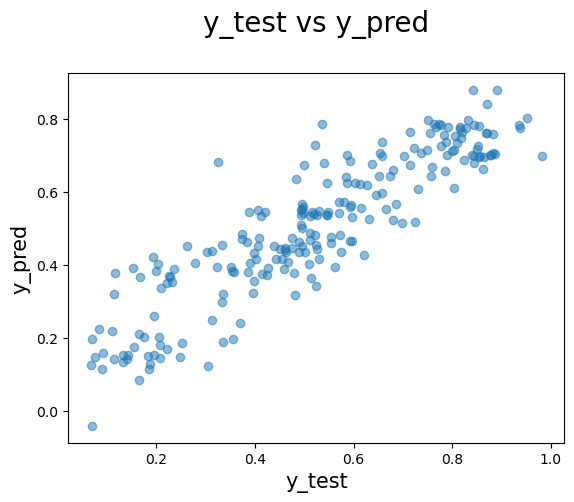

In [81]:
# Plotting y_test and y_pred to understand

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('y_test vs y_pred\n', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

plt.show()

In [82]:
r2_score(y_test, y_pred)

0.7983128802041632

In [83]:
X_test.shape

(219, 13)

In [84]:
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7855229652902809

### Final Comparision of the result
### Train R^2 :0.7642
### Train Adjusted R^2 0.7587
### Test R^2 :0.7988
### Test Adjusted R^0.785.
### The model seems to have predicted pretty well.

#### As per the Final Model, the top 3 Predictor Variables that are needed for the prediction purposes are:
-  #### Wheather Situation 
-  #### Season 
-  #### Year